In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as pl
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("cleaned_BlackFriday_sales.csv")
df.drop("Unnamed: 0",inplace=True,axis=1)

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


making a copy of the original dataframe

In [5]:
df1=df.copy()

In [6]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

In [7]:
df.groupby("Gender")["User_ID"].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

The total 5891 customers on black friday sale consists of 1666 females and 4225 males

<Axes: title={'center': 'Gender Ratio'}, ylabel='User_ID'>

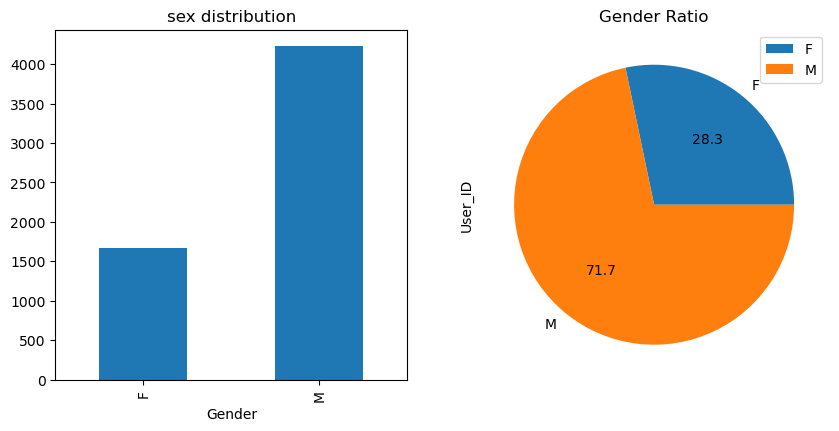

In [9]:
plt.subplot(2,2,1)
df.groupby("Gender")["User_ID"].nunique().plot(kind="bar",figsize=(10,10),title="sex distribution")
plt.subplot(2,2,2)
df.groupby("Gender")["User_ID"].nunique().plot(kind="pie",autopct="%0.1f",legend=True,title="Gender Ratio",figsize=(10,10))

The above Bar graph shows how many males and females present among the customers we can say that there were 4225 males and 1666 females which account to 71.7% and 28.3% respectively

<Axes: xlabel='City_Category', ylabel='count'>

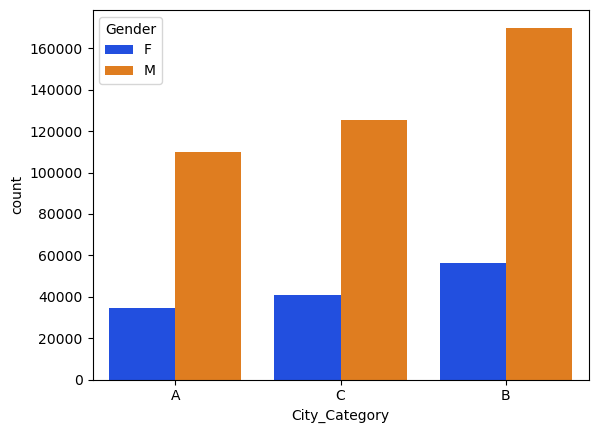

In [11]:
sns.countplot(x="City_Category",hue="Gender",palette="bright",legend=True,data=df)

The bar graph illustrates the purchases made by males and females across different cities. It is evident that, in every city, the number of purchases made by males surpasses those made by females. Overall, City B records the highest number of purchases

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

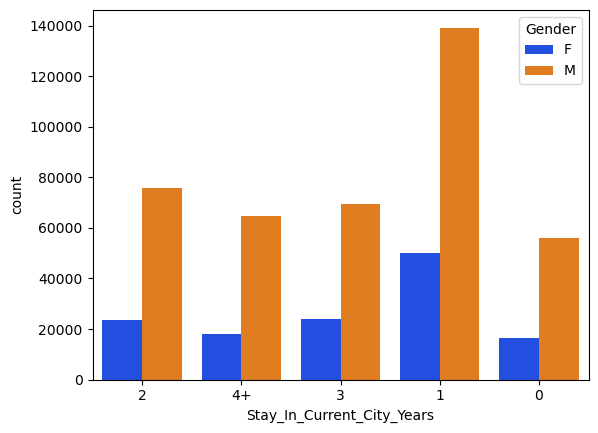

In [13]:
sns.countplot(hue="Gender",x="Stay_In_Current_City_Years",palette="bright",legend=True,data=df)

The bar graph illustrates the number of purchases made by male and female customers across each 'Stay_in_current_city_Years' category. From the graph, it is clear that, for every 'Stay_in_current_city_Years' value, the number of purchases by male customers exceeds those by female customers. Overall, the highest number of purchases were made by residents who have stayed in a city for at most one year

<Axes: title={'center': 'Average purchase'}, ylabel='Purchase'>

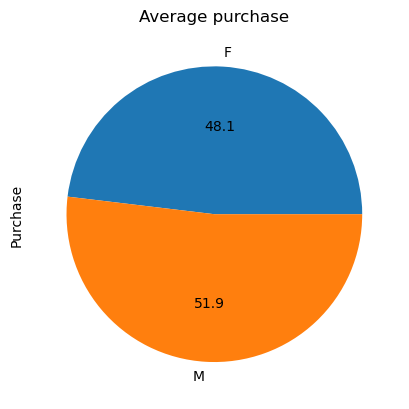

In [15]:
df.groupby("Gender")["Purchase"].mean().plot(kind="pie",autopct="%0.1f",title="Average purchase")

In [16]:
df.groupby("Gender")["Purchase"].mean()

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

The 'Average Purchase' pie chart depicts the mean expenditure of male and female customers, which are quite similar—₹9,504 for males and ₹8,809 for females. These amounts correspond to 51.9% and 48.1% of the total expenditure, respectively

<Axes: ylabel='Purchase'>

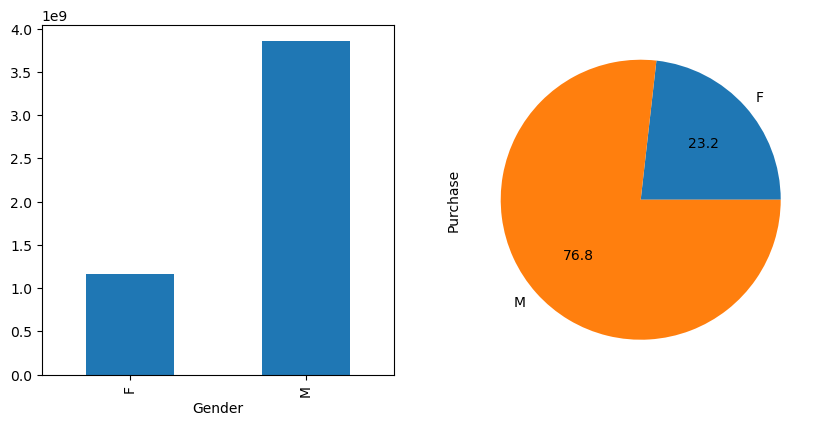

In [17]:
plt.subplot(2,2,1)
df.groupby("Gender").sum()["Purchase"].plot(kind="bar")
plt.subplot(2,2,2)
df.groupby("Gender").sum()["Purchase"].plot(kind="pie",autopct="%0.1f",figsize=(10,10))

The above bar graph illustrates that The total purchase done by female is more 10^9 and by males it is closer to 4x10^9 which accounts for 23.3% and 76.8% of the total purchase respectively.